# META DSN HACKATHON



## Kenya maternity solution for predicting next health center

In [1]:
# importing my libaries
import numpy as np
import math
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from arcgis.gis import GIS
gis = GIS("home")
import warnings
warnings.filterwarnings("ignore")

<Item title:"kenya-shapefiles" type:Feature Collection owner:Njoki.M>
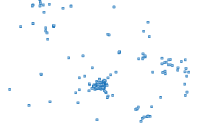

In [2]:
# Item Added From Toolbar
# Title: Kenya Health Facilities | Type: Feature Service 
ken_health_facilities_old = gis.content.get("281c9efb928d427381582e5d71436bfc")
ken_health_facilities_old

<Item title:"health facilities_& states" type:Feature Collection owner:Njoki.M>
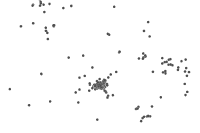

In [2]:


# Item Added From Toolbar
# Title: Kenya Health Facilities | Type: Feature Service 
ken_health_facilities = gis.content.get("7349013e2687410789e07b84c46194be")
ken_health_facilities

In [3]:
# bring out the layer of my map 
ken_health_facilities_layer = ken_health_facilities.layers[0]
ken_health_facilities_sdf = ken_health_facilities_layer.query().sdf #whats sdf?
ken_health_facilities_sdf.head()

,FID,X,Y,osm_id,osm_type,completene,is_in_heal,amenity,speciality,addr_stree,...,NAME_1,ID_2,NAME_2,ID_3,NAME_3,TYPE_3,ENGTYPE_3,NL_NAME_3,VARNAME_3,SHAPE
0,0,36.829891,-1.171633,5.327748e+09,node,18,,hospital,,,...,Central,1,Kiambu,3,Kiambaa,Tarafa|Taarafa,Division,,,"{""x"": 4099884.7, ""y"": -130434.7, ""spatialRefer..."
1,1,36.828768,-1.171645,5.329658e+09,node,15,,hospital,,,...,Central,1,Kiambu,3,Kiambaa,Tarafa|Taarafa,Division,,,"{""x"": 4099759.7, ""y"": -130436, ""spatialReferen..."
2,2,36.828669,-1.171597,5.329658e+09,node,12,,hospital,,,...,Central,1,Kiambu,3,Kiambaa,Tarafa|Taarafa,Division,,,"{""x"": 4099748.6, ""y"": -130430.6, ""spatialRefer..."
3,3,36.829104,-1.171956,6.064157e+09,node,18,,hospital,,Biashara Street Kiambu,...,Central,1,Kiambu,3,Kiambaa,Tarafa|Taarafa,Division,,,"{""x"": 4099797.1, ""y"": -130470.6, ""spatialRefer..."
4,4,36.829015,-1.171951,6.064157e+09,node,18,,hospital,,Biashara Street Kiambu,...,Central,1,Kiambu,3,Kiambaa,Tarafa|Taarafa,Division,,,"{""x"": 4099787.2, ""y"": -130470.1, ""spatialRefer..."


In [5]:
ken_health_facilities_sdf.columns

Index(['FID', 'X', 'Y', 'osm_id', 'osm_type', 'completene', 'is_in_heal',
       'amenity', 'speciality', 'addr_stree', 'operator', 'water_sour',
       'changeset_', 'insurance', 'staff_doct', 'contact_nu', 'uuid',
       'electricit', 'opening_ho', 'operationa', 'source', 'is_in_he_1',
       'hidden', 'changese_1', 'emergency', 'changese_2', 'addr_house',
       'addr_postc', 'health_ame', 'addr_city', 'name', 'staff_nurs',
       'changese_3', 'wheelchair', 'beds', 'url', 'dispensing', 'healthcare',
       'operator_t', 'tag', 'ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'ID_2',
       'NAME_2', 'ID_3', 'NAME_3', 'TYPE_3', 'ENGTYPE_3', 'NL_NAME_3',
       'VARNAME_3', 'SHAPE'],
      dtype='object')

In [6]:
ken_health_facilities_sdf[ken_health_facilities_sdf.changese_1 == 'Nairobi']

,FID,X,Y,osm_id,osm_type,completene,is_in_heal,amenity,speciality,addr_stree,...,NAME_1,ID_2,NAME_2,ID_3,NAME_3,TYPE_3,ENGTYPE_3,NL_NAME_3,VARNAME_3,SHAPE


In [7]:
Kenya_map = gis.map("Kenya", zoomlevel=6)
Kenya_map

MapView(layout=Layout(height='400px', width='100%'))

In [8]:
# plotting the health facilties are on our map
ken_health_facilities_sdf.spatial.plot(map_widget=Kenya_map,
                        renderer_type='s',
                        symbol_type='simple',
                        symbol_style='d', # d - for diamonds
                        colors='Reds_r',
                        marker_size=5)

True

In [4]:
# number of health facilties
count_health_facilities = ken_health_facilities_sdf\
                .groupby(['NAME_2'], as_index=False)\
                .agg(count_health_facilities=('NAME_2',np.count_nonzero))
count_health_facilities.head()

,NAME_2,count_health_facilities
0,,645
1,Baringo,58
2,Bungoma,3
3,Busia,1
4,Embu,5


<AxesSubplot:title={'center':'number of health site'}, xlabel='count_health_facilities', ylabel='NAME_2'>

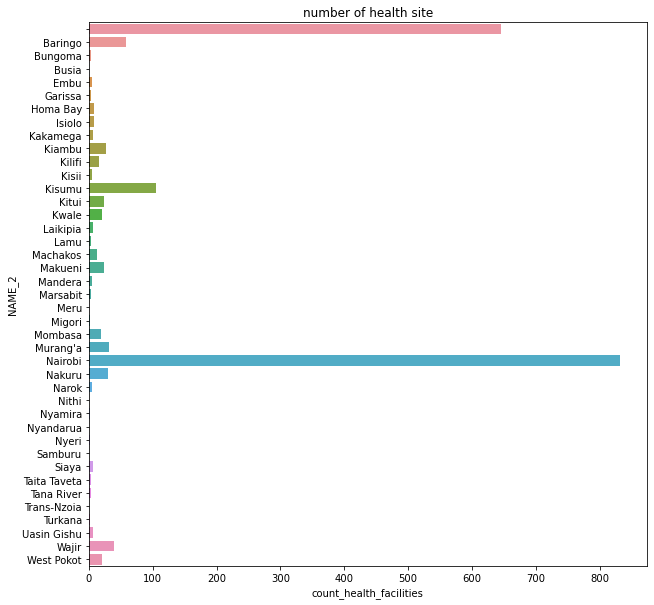

In [5]:
# plotting the number of health site
plt.figure(figsize=(10,10))
plt.title('number of health site')
sns.barplot(x='count_health_facilities', y='NAME_2', data=count_health_facilities)

The highest number of hospital is in nairobi

### Importing the kenya mobility data and extracting the neccessary information

In [ ]:
# Item Added From Toolbar
# Title: Kenya_movement_range | Type: Feature Service | Owner: chinazo9
ken_mrange = gis.content.get("a655260171e644e78e865fcda324af3a")
ken_mrange

In [ ]:
ken_mrange.layers[0]

In [ ]:
# changing my layers to dataframe
ken_mrange_layer = ken_mrange.layers[0]
ken_mrange_sdf = ken_mrange_layer.query().sdf
ken_mrange_sdf.head()

In [ ]:
# filtering only 2022 movement range
ken_mrange_sdf = ken_mrange_layer.query(where="ds>'2021-12-31'").sdf
ken_mrange_sdf.head()

In [ ]:
def average_occurence(data, state_code, state_name, target):
    """ This average will help you get the addition of all target in
    groupby the state name and code that are in the particular dataset 
    you are working with """
    data\
        .groupby([state_code, state_name], as_index=False)\
        .agg(avg_mobility_change=(target,np.mean))

In [ ]:
# Average movement range for 2022
avg_mobility = nga_mrange_sdf\
                .groupby(['NAME_1'], as_index=False)\
                .agg(avg_mobility_change=('all_day_bing_tiles_visited_rela',np.mean))
avg_mobility.head()

In [ ]:
# plotting the avg_mobility_change 
plt.figure(figsize=(8,10))
plt.title('avg_mobility_change')
sns.barplot(x='avg_mobility_change', y='NAME_1', data=avg_mobility)

### importing the pregnancy dataset for kenya

<Item title:"Kenya Pregnancies_WFL1" type:Feature Layer Collection owner:krocke_uwi2017>
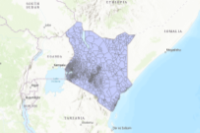

In [6]:
# Item Added From Toolbar
# Title: Kenya Pregnancies_WFL1 | Type: Feature Service | Owner: krocke_uwi2017
pregnancy_data = gis.content.get("3e133a24b5864e89ad49f2f75dec112c")
pregnancy_data

In [7]:
pregnancy_data_layer = pregnancy_data.layers[0]
pregnancy_data_sdf = pregnancy_data_layer.query().sdf
pregnancy_data_sdf.head()

,OBJECTID,gid,pop2009,county,subcounty,ward,uid,scuid,cuid,organisationunitid,...,adol1519Jan_Mar_2017,adol1014Jan_Mar_2018,adol1519Jan_Mar_2018,adol1014Jan_Mar_2019,adol1519Jan_Mar_2019,adol1014Jan_Mar_2020,adol1519Jan_Mar_2020,Shape__Area,Shape__Length,SHAPE
0,1,241,17431,ISIOLO,Isiolo Sub County,WABERA,rIdiIpv9fBt,I2LYLqKU6AW,bzOfj0iwfDH,rIdiIpv9fBt,...,256.0,9.0,274.0,1.0,292.0,1.0,110.0,1.306913e+07,19901.358598,"{""rings"": [[[4185577.21088152, 44560.871167269..."
1,2,1455,18755,Migori,Rongo Sub County,North Kamagambo Ward,QC41mItjIzF,fT37q3rXQ35,fVra3Pwta0Q,QC41mItjIzF,...,59.0,5.0,84.0,5.0,51.0,4.0,63.0,4.651098e+07,28704.408993,"{""rings"": [[[3851584.90949789, -72419.10958822..."
2,3,1456,27756,Migori,Rongo Sub County,Central Kamagambo Ward,M8rGveWTIMm,fT37q3rXQ35,fVra3Pwta0Q,M8rGveWTIMm,...,141.0,8.0,128.0,3.0,141.0,8.0,177.0,2.916718e+07,24048.227598,"{""rings"": [[[3852962.87758862, -81662.99747771..."
3,4,1457,27179,Migori,Rongo Sub County,South Kamagambo Ward,DABObbHgPMX,fT37q3rXQ35,fVra3Pwta0Q,DABObbHgPMX,...,79.0,2.0,150.0,3.0,168.0,5.0,86.0,6.913211e+07,58027.483037,"{""rings"": [[[3853603.89628833, -97177.66497901..."
4,5,1458,22874,Migori,Awendo Sub County,North Sakwa Ward,EmSsP2C6A3h,ka9Uv3Ckcbd,fVra3Pwta0Q,EmSsP2C6A3h,...,69.0,6.0,124.0,8.0,87.0,4.0,40.0,5.401764e+07,59102.448838,"{""rings"": [[[3846477.4187271, -83706.778568055..."


In [8]:
pregnancy_data_sdf.columns

Index(['OBJECTID', 'gid', 'pop2009', 'county', 'subcounty', 'ward', 'uid',
       'scuid', 'cuid', 'organisationunitid', 'adol1014Apr_Jun_2016',
       'adol1519Apr_Jun_2016', 'adol1014Apr_Jun_2017', 'adol1519Apr_Jun_2017',
       'adol1014Apr_Jun_2018', 'adol1519Apr_Jun_2018', 'adol1014Apr_Jun_2019',
       'adol1519Apr_Jun_2019', 'adol1014Apr_Jun_2020', 'adol1519Apr_Jun_2020',
       'adol1014Jan_Mar_2016', 'adol1519Jan_Mar_2016', 'adol1014Jan_Mar_2017',
       'adol1519Jan_Mar_2017', 'adol1014Jan_Mar_2018', 'adol1519Jan_Mar_2018',
       'adol1014Jan_Mar_2019', 'adol1519Jan_Mar_2019', 'adol1014Jan_Mar_2020',
       'adol1519Jan_Mar_2020', 'Shape__Area', 'Shape__Length', 'SHAPE'],
      dtype='object')

In [9]:
sum_pregnancy_data = pregnancy_data_sdf\
                .groupby(['county'], as_index=False)\
                .agg(sum_pregnancy_data=('adol1519Jan_Mar_2020',np.sum))
sum_pregnancy_data.head()

,county,sum_pregnancy_data
0,BARINGO,1268.0
1,Bomet,2147.0
2,Bungoma,3237.0
3,Busia,1524.0
4,ELGEYO-MARAKWET,929.0


<AxesSubplot:title={'center':'number of pregnncy'}, xlabel='sum_pregnancy_data', ylabel='county'>

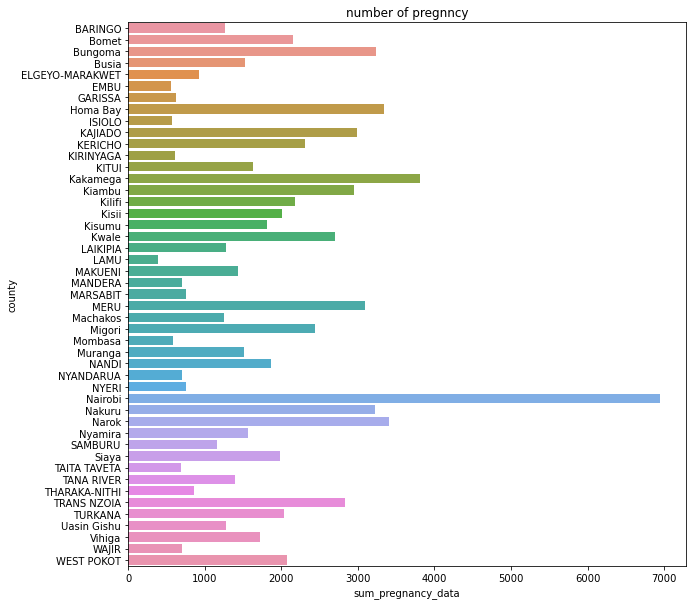

In [11]:
plt.figure(figsize=(10,10))
plt.title('number of pregnncy')
sns.barplot(x='sum_pregnancy_data', y='county', data=sum_pregnancy_data)

the biggest demand of pregnancy is Nairobi however we can't conclude with this. we need to know the the precising demand by getting the ratio of the pregnancy to the health facilties 

In [12]:
def merge(data1,data2,column1,column2):
    
    """this function will help you to combine two table together
    and delete the similar column where: 
    * data1 is the name of the first table 
    * data2 is the name of the second table
    * column1 is the name of the column to join in data1
    * column2 is the name of the column to join in data2
    """
    
    name = data1.merge(data2, left_on = column1, right_on = column2)
    name = name.drop(column2, axis = 1)
    return name

In [15]:
best_county = merge(sum_pregnancy_data,count_health_facilities, 'county', 'NAME_2')

In [19]:
pregnancy_health_ratio = best_county['sum_pregnancy_data']/best_county['count_health_facilities']
best_county['pregnancy_health_ratio'] = pregnancy_health_ratio
best_county.head()

,county,sum_pregnancy_data,count_health_facilities,pregnancy_health_ratio
0,Bungoma,3237.0,3,1079.000000
1,Busia,1524.0,1,1524.000000
2,Homa Bay,3340.0,8,417.500000
3,Kakamega,3807.0,6,634.500000
4,Kiambu,2954.0,27,109.407407


<AxesSubplot:title={'center':'best_county'}, xlabel='pregnancy_health_ratio', ylabel='county'>

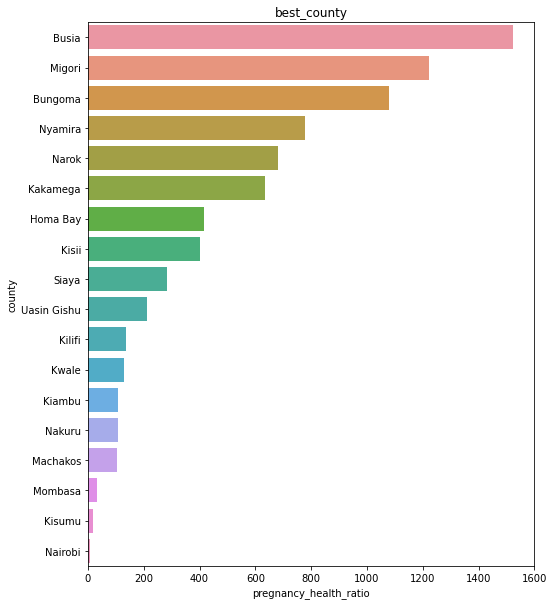

In [22]:
best_county = best_county.sort_values(by='pregnancy_health_ratio', ascending = 0)
plt.figure(figsize=(8,10))
plt.title('best_county')
sns.barplot(x='pregnancy_health_ratio', y='county', data=best_county)

### As we can all see the best county for the siting the next health center is Busia